# Nuages de mots

## Imports et stopwords

In [40]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tdeganck\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "leurs", "petit", "ecr", "tél", "rue",
       "brux", "prés", "gar", "app", "part", "mois", "louer", "francs", "chée", "très", "etc", 
       "bon", "téléph", "ans", "prix", "terr", "mod"]
sw = set(sw)


## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [48]:
cluster = "cluster_1_texts"

In [49]:
def clean_text(cluster, folder=None):
    if folder is None:
        input_path = f"{cluster}.txt"
        output_path = f"{cluster}_clean.txt"
    else:
        input_path = f"{folder}/{cluster}.txt"
        output_path = f"{folder}/{cluster}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de la décennie

In [50]:
clean_text(cluster, folder=None)

'Output has been written in cluster_1_texts_clean.txt!'

In [51]:
# Vérifier le résultat
with open(os.path.join(os.getcwd(), f'{cluster}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'MARDI JANVIER SOIR LAWN TENNIS CLASSEMENTS OFFICIELS SÉRIE SUITE CLASSEMENTS OFFICIELS LÊRLE ENTAMÉS PRÉCÉDENTES ÉDITIONS FLANDRES ALLEGAERT MOUS WINNOLA ALLOGNERT HIRONDELLE SENS GHENT BERTRAND ROESELARE BLLLIET WLKLNGS NTXYKEAS TAMISE BOONE OHENT BOURGEOIS RIANDRAGAN BRAOKE GANTOISE NRICKMNN TEMSE BRNCT IFFLTTE BECR BUSSCLIACRT MOUB RROITNOLS BUSSCHAERT BUYS HSERT GEORGES BUYSSC BYTTEBLER WLKLNG CAL WLRE CALIONS HNFS CARRCTTE COQ ANGLAIS CLAESSENS COUCKC HVITTAN BEER DAUVTLLC MOUS JRÔNNOLS BEU'

## Nuage de mots

### Afficher les termes les plus fréquents


In [52]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('BRUXELLES', 4595), ('COURS', 2835), ('GRAND', 2645), ('SAINT', 2559), ('SOIR', 2515), ('BELGIQUE', 2452), ('PAYS', 2392), ('HEURES', 2380), ('TEMPS', 2306), ('PEU', 2287)]


### Créer, stocker et afficher le nuage de mots

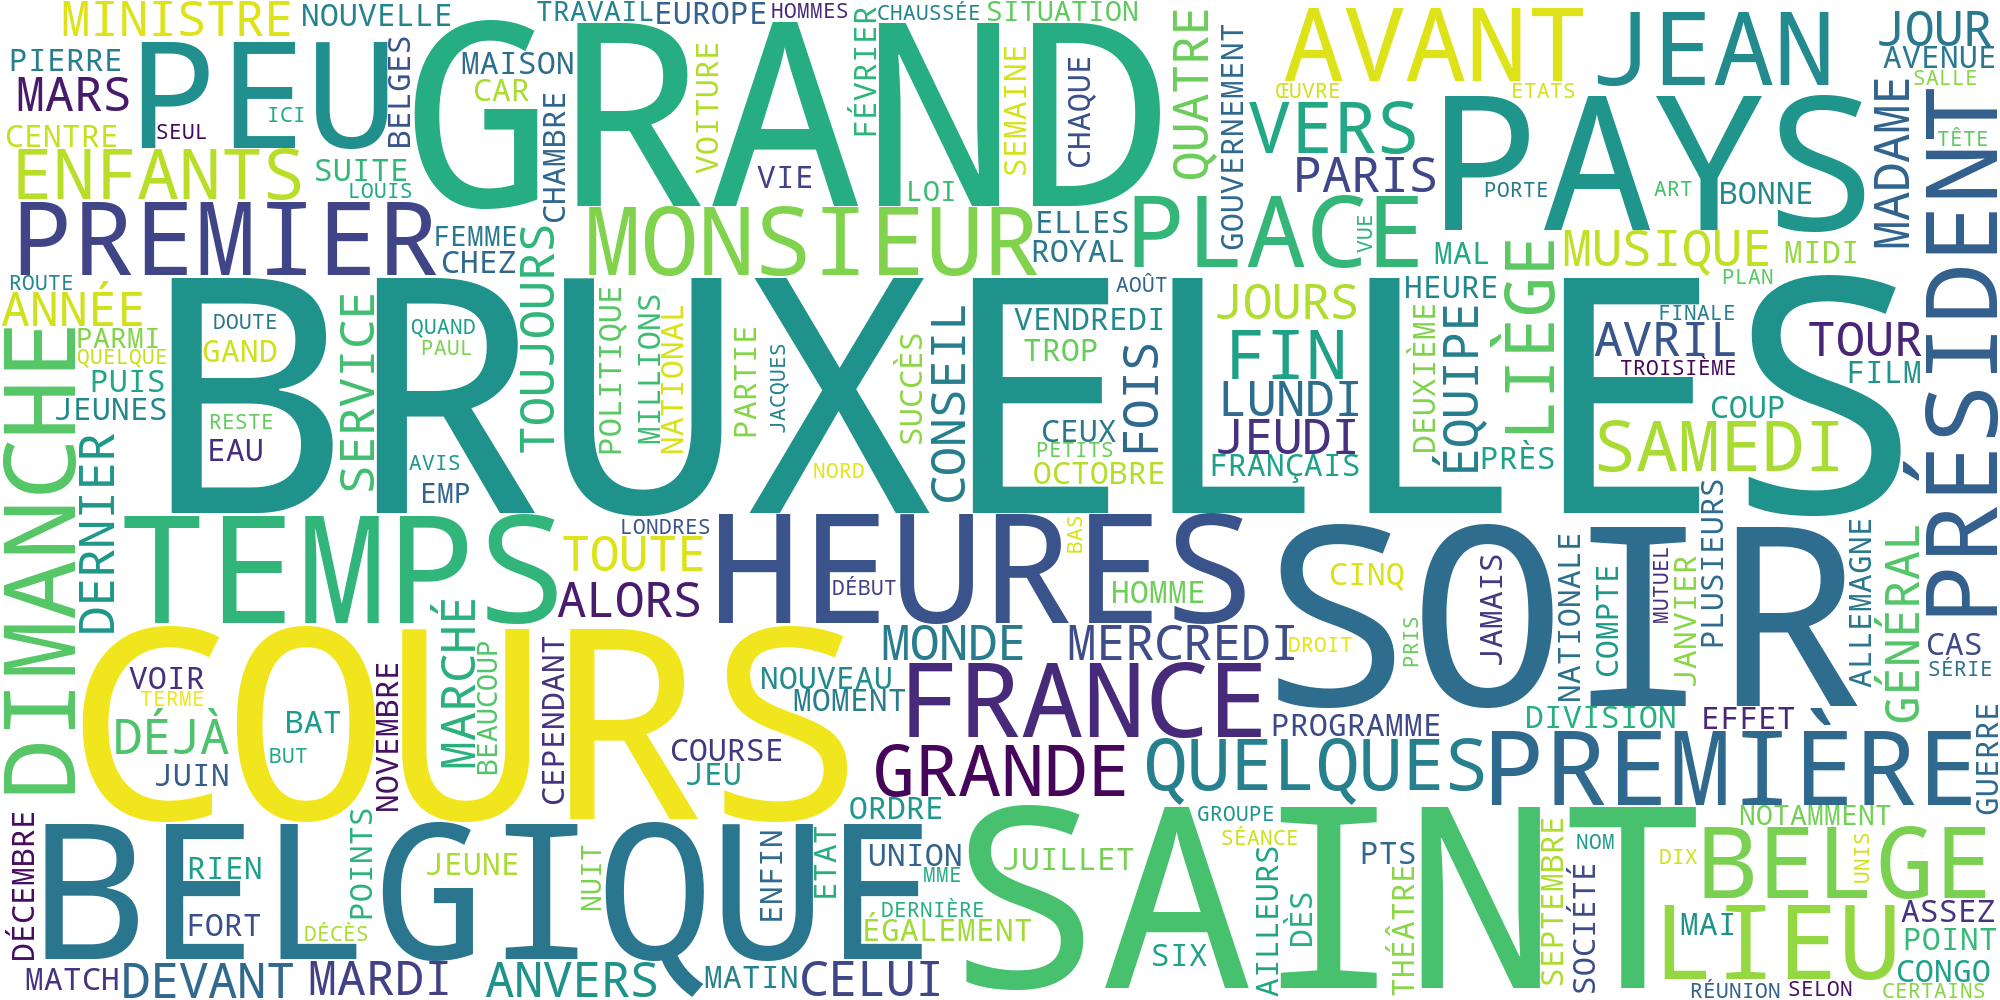

In [53]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{cluster}.png"))
Image(filename=os.path.join(temp_path, f"{cluster}.png"))